In [14]:
import pandas as pd
import numpy as np
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt

In [9]:
def load_acoustic_fullmatrices(extraction_type = 'full',extract_fd = False):
    if(extraction_type in ['full','wc','cw']):
        try:
            if(extract_fd):
                fullmfcc_matrix_fd = None
                fullrmse_matrix_fd = pd.read_pickle('pickles/patterns/'+extraction_type+'_rmse_matrix_fd.pickle')
                print('Successfully loaded '+extraction_type+' RMSE Matrix FULLDATA')
                fullzcr_matrix_fd = pd.read_pickle('pickles/patterns/'+extraction_type+'_zcr_matrix_fd.pickle')
                print('Successfully loaded '+extraction_type+' ZCR Matrix FULLDATA')   
                with open('pickles/patterns/'+extraction_type+'_mfcc20_matrix_fd.pickle','rb') as f:
                    save = pickle.load(f)
                    fullmfcc_matrix_fd = save['multimatrix']
                    del save
                print('Successfully loaded '+extraction_type+' MFCC Matrices FULLDATA')
                fullmfcc_matrix_fd.append(fullrmse_matrix_fd)
                fullmfcc_matrix_fd.append(fullzcr_matrix_fd)
                return fullmfcc_matrix_fd
            else:
                fullmfcc_matrix = None
                fullrmse_matrix = pd.read_pickle('pickles/patterns/'+extraction_type+'_rmse_matrix.pickle')
                print('Successfully loaded '+extraction_type+' RMSE Matrix')   
                fullzcr_matrix = pd.read_pickle('pickles/patterns/'+extraction_type+'_zcr_matrix.pickle')
                print('Successfully loaded '+extraction_type+' ZCR Matrix')
                with open('pickles/patterns/'+extraction_type+'_mfcc20_matrix.pickle','rb') as f:
                    save = pickle.load(f)
                    fullmfcc_matrix = save['multimatrix']
                    del save
                print('Successfully loaded '+extraction_type+' MFCC Matrices') 
                fullmfcc_matrix.append(fullrmse_matrix)
                fullmfcc_matrix.append(fullzcr_matrix)
                return fullmfcc_matrix
        except Exception as e:
            print('Error loading matrix: ', e)
    else:
        print('Error')
        return None,None

In [152]:
full_matrices = load_acoustic_fullmatrices(extraction_type='full',extract_fd = True)
wc_matrices = load_acoustic_fullmatrices(extraction_type='wc',extract_fd = True)
cw_matrices = load_acoustic_fullmatrices(extraction_type='cw',extract_fd = True)
########################################################################################
RMSE_INDEX = 20
ZCR_INDEX = 21
em_df = pd.read_pickle('pickles/patterns/pfief_matrix.pickle')
pf  = pd.read_pickle('pickles/patterns/pf_matrix.pickle')

Successfully loaded full RMSE Matrix FULLDATA
Successfully loaded full ZCR Matrix FULLDATA
Successfully loaded full MFCC Matrices FULLDATA
Successfully loaded wc RMSE Matrix FULLDATA
Successfully loaded wc ZCR Matrix FULLDATA
Successfully loaded wc MFCC Matrices FULLDATA
Successfully loaded cw RMSE Matrix FULLDATA
Successfully loaded cw ZCR Matrix FULLDATA
Successfully loaded cw MFCC Matrices FULLDATA


In [150]:
corr = full_matrices[RMSE_INDEX].corr()
# corr = em_df.corr()
full_matrices[RMSE_INDEX]

,ang,hap,neu,sad
.+ a,0.090592,0.033405,0.027377,0.019348
.+ a big,0.059278,NaN,0.035763,0.019379
.+ a bit,0.010465,NaN,0.025979,NaN
.+ a day,0.096399,NaN,0.008552,0.072628
.+ a dog,NaN,NaN,0.028417,NaN
.+ a few,NaN,0.021887,0.015572,NaN
.+ a good,0.083010,0.019103,0.030130,0.018796
.+ a guy,NaN,NaN,NaN,0.012817
.+ a little,0.060562,0.028588,0.029786,0.024871
.+ a lot,0.120197,0.039950,0.028111,0.025224


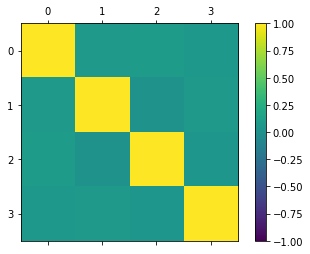

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()

In [67]:
corr

,ang,hap,neu,sad
ang,1.000000,0.080116,0.101911,0.068538
hap,0.080116,1.000000,0.030617,0.077017
neu,0.101911,0.030617,1.000000,0.047459
sad,0.068538,0.077017,0.047459,1.000000


In [153]:
acoustic_feature_names = ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20','rmse','zcr']
emo_set = ['ang','sad','hap','neu']
final = {}
for ac_i,names in enumerate(acoustic_feature_names):
    temp_hash = {}
    for emo in emo_set:
        temp1 = full_matrices[ac_i].loc[:,emo]
        temp2 = pf.loc[:,emo]
        corr2 = pd.DataFrame([temp1,temp2]).T.corr()
        correlation = corr2.values[0][1]
        temp_hash[emo] = correlation
    final[names] = temp_hash
final = pd.DataFrame(final)

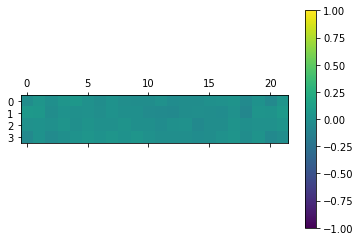

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(final, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()

In [155]:
final.T

,ang,hap,neu,sad
mfcc1,-0.018219,0.064484,0.009510,-0.059433
mfcc10,0.043059,0.055237,0.017899,0.019942
mfcc11,-0.005967,-0.022466,0.003130,-0.032451
mfcc12,0.042012,0.017407,0.035774,-0.007508
mfcc13,0.058679,0.004753,-0.001229,0.016555
mfcc14,0.010449,0.012007,0.025155,0.040186
mfcc15,-0.023098,-0.008921,0.000871,0.018942
mfcc16,0.020524,0.023352,0.001431,0.042095
mfcc17,-0.010307,-0.006787,0.030506,0.023325
mfcc18,-0.022128,-0.002390,-0.003679,0.042319


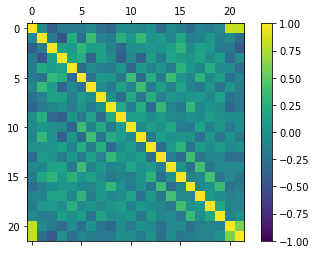

In [120]:
temp_list = []
acoustic_feature_names = ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20','rmse','zcr']
emo = 'neu'
for matrix in full_matrices:
    temp_list.append(matrix.loc[:,emo])
df = pd.DataFrame(temp_list).T
df.columns = acoustic_feature_names
corr3 = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr3, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()

In [122]:
corr3.iloc[:,20:]

,rmse,zcr
mfcc1,0.823168,0.819868
mfcc2,-0.054805,-0.287073
mfcc3,-0.179950,-0.439414
mfcc4,-0.284675,-0.010326
mfcc5,-0.015759,-0.287188
mfcc6,-0.254096,-0.092831
mfcc7,0.030962,-0.148546
mfcc8,-0.229596,-0.183263
mfcc9,-0.319908,-0.182137
mfcc10,-0.002957,-0.013910
